## Milk Quality Data preparation and prediction Model. 

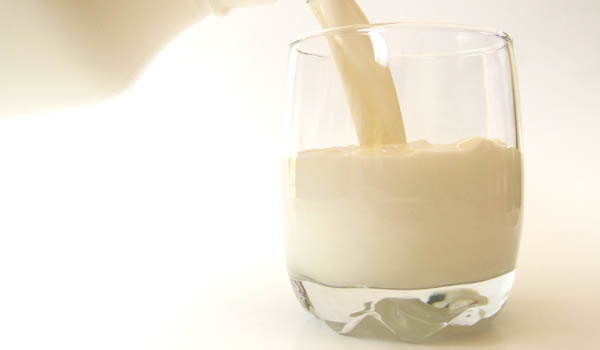

### Introduction
Global milk production is a cornerstone of the dairy industry, supplying essential nutrients to billions of people. Ensuring high milk quality is vital for public health, as it affects the safety, nutritional value, and consumer trust in dairy products. 

Data analysis plays a crucial role in monitoring milk quality by identifying contaminants, tracking production efficiency, and predicting potential issues. By leveraging data, dairy producers can improve quality control, enhance sustainability, reduce waste, and meet regulatory standards. Effective analysis not only safeguards public health but also strengthens the dairy industry's resilience and long-term viability in a competitive global market.

### Data collection and component 
The milk quality dataset was manually collected from a dairy production farm, but it was later sourced from Kaggle, a publicly available dataset platform.

The dataset consists of 7 independent variables ***(pH, Temperature, Taste, Odor, Fat, Turbidity, and Color) and 1 dependent variable (Quality Grade).***

### Project Overveiw
This project aims to explore the variance in the numerical variables and examine if there are statistically significant differences in the means of these variables across the levels of the categorical target variable using ***ANOVA***. The analysis will compare the variance within groups (levels of the categorical variable) to the variance between groups to determine if they are significantly different.

In-depth data cleaning and standardization will be conducted to ensure the reliability of the predictive model.

### Objective

1. Conduct a detailed exploratory data analysis (EDA) of the dataset, including statistical exploration and visualization.
2. Perform Chi-square and ANOVA hypothesis testing to determine the statistical significance of variances in both numerical and categorical variables   relative to the target variable.
3. Carry out comprehensive data cleaning and standardization as necessary.
4. Select and train two classification models to predict the quality of milk based on the independent variables.
5. Create a detailed Power BI dashboard to visualize trends and insights. 

##### 1.1 Data Exploration

In [17]:
import pandas as pd
import numpy as np
import plotly.graph_objects as plt
import seaborn as sns
import matplotlib.pyplot as mt

In [21]:
df = pd.read_csv('milknew.csv')

In [23]:
df.shape

(1059, 8)

In [25]:
df.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [29]:
df.dtypes

pH            float64
Temprature      int64
Taste           int64
Odor            int64
Fat             int64
Turbidity       int64
Colour          int64
Grade          object
dtype: object

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


The frist 5 lines of codes sort to do the following: 
1. Import the python liabriries required for data exploration
2. Load the data using object 'read_csv' and passing the data name as an argument.
3. The shape revealed there are 1059 rows and 8 columns in the milk quality dataset, of which 6 are numerical variables and the remaining 2 are float and texts respectively.

However based on information from data dictionary, it was stated that ['Taste', 'Turbidity', 'Odor', 'Fat'] variables are categorical variables, there are 2 categories in each of this variables represented by [0 and 1].

***Taste:*** The palatability of the milk produced. 
Category 1: suggests the milk taste is good.
Category 0: suggests the milk tast is bad.

***Odor:*** The quality of smell of the milk. 
Category 1: suggests the milk as a bad odor.
Category 0: suggests the milk as a good odor. 

***Fat***: 
Category 1: Suggest milk has a high fat content.
Category 0: Suggest milk has a low fat content.

***Turbidity***: Turbidity in milk refers to how cloudy or opaque the milk appears, which is usually an indication of the amount of suspended particles in the liquid. In milk, turbidity is primarily influenced by the presence of fat globules, proteins, and other particulate matter.
Category 1: Suggest milk has a high turbidity.
Category 0: Suggest milk has a low turbidity.


#### Standardize data types

In [40]:
df.columns

Index(['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour',
       'Grade'],
      dtype='object')

In [44]:
df['Taste'].unique()

[1, 0]
Categories (2, int64): [0, 1]

In [50]:
df['Turbidity'].unique()

[0, 1]
Categories (2, int64): [0, 1]

In [46]:
df['Odor'].unique()

[0, 1]
Categories (2, int64): [0, 1]

In [48]:
df['Fat'].unique()

[1, 0]
Categories (2, int64): [0, 1]

I implemented those steps to explore the number of categories in each of the available categorical variables. This ensures the true number of categories in the dataset here matches with the data dictionary, call it a Standardization check. 

#### Convert them to categorical variables explicitly

In [55]:
df['Taste'] = df['Taste'].astype('category')
df['Turbidity'] = df['Turbidity'].astype('category')
df['Odor'] = df['Odor'].astype('category')
df['Fat'] = df['Fat '].astype('category')

In [57]:
df.dtypes

pH             float64
Temprature       int64
Taste         category
Odor          category
Fat              int64
Turbidity     category
Colour           int64
Grade           object
Fat           category
dtype: object

In [63]:
df.columns

Index(['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour',
       'Grade', 'Fat'],
      dtype='object')

In [67]:
df.drop('Fat ', axis= 1, inplace=True)

In [82]:
df['Colour'] = df['Color']

In [84]:
df.dtypes

pH             float64
Temprature       int64
Taste         category
Odor          category
Turbidity     category
Colour           int64
Grade           object
Fat           category
Color            int64
dtype: object

In [86]:
df.drop('Colour', axis= 1, inplace=True)

#### Statistical description

In [89]:
df.describe()

,pH,Temprature,Color
count,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,251.840415
std,1.399679,10.098364,4.307424
min,3.000000,34.000000,240.000000
25%,6.500000,38.000000,250.000000
50%,6.700000,41.000000,255.000000
75%,6.800000,45.000000,255.000000
max,9.500000,90.000000,255.000000


#### Statistical Insights of Milk Quality Based on pH, Temperature, and Color
1.  ***pH***

***Mean (6.63):*** The average pH level of the milk samples is slightly acidic, as pH 7.0 is neutral. Milk typically has a pH around 6.5 to 6.7, so this average falls within a normal range, implying that most milk samples are fresh or of acceptable quality.
   
***Standard Deviation (1.4):*** The relatively high standard deviation suggests considerable variation in the acidity/alkalinity of the milk samples, possibly indicating differences in freshness, spoilage, or contamination levels.

***Min (3.0) and Max (9.5):*** These extremes indicate that some milk samples were highly acidic (possibly spoiled), while others were more alkaline than normal, which might suggest issues like bacterial growth or contamination.

***Quartiles (25%, 50%, 75%):*** The distribution shows that most samples fall within a slightly acidic range, where milk is considered to be in good condition, as expected in dairy products. However, a small portion shows abnormal acidity or alkalinity.

***Implication:*** Dormain knowledge suggests pH levels significantly impact milk quality. Low pH values (below 6) suggest spoilage, while high pH values (above 7.5) might indicate bacterial activity or poor quality control in milk storage or processing.

2. ***Temperature***

***Mean (44.23°C):*** This is a surprisingly high average temperature, far above the ideal storage temperature for milk, which should be around 4°C. This suggests that the temperature recorded may be related to processing stages (e.g., pasteurization) rather than storage conditions.

***Standard Deviation (10.1):*** A large variation in temperature suggests differences in the conditions under which the milk samples were processed or stored. This could point to inconsistencies in temperature control during different stages of milk handling.

***Min (34°C) and Max (90°C):*** The lower end is still well above the ideal storage temperature for milk, while the maximum suggests that some samples were processed at high heat, likely during pasteurization.

***Quartiles (25%, 50%, 75%):*** The quartiles indicate that most of the milk was in the range of 38°C to 45°C, which is high for storage but common during heating processes like pasteurization.

***Implication:*** Temperature plays a crucial role in milk quality. Higher temperatures during storage can lead to bacterial growth and spoilage, while controlled heating during pasteurization ensures safety. However, inconsistent temperatures could compromise milk quality or safety.

3. ***Color***

***Mean (251.84):*** The average color value is close to 255, which suggests that the milk samples tend to be opaque and whitish, as expected for normal milk.

***Standard Deviation (4.31):*** The small standard deviation indicates very little variation in milk color, suggesting consistent quality in terms of appearance.

***Min (240) and Max (255):*** The color range is quite narrow, with all samples close to the whitish color typically associated with good-quality milk.

***Quartiles (25%, 50%, 75%):*** Most of the milk samples fall near the high end of the color spectrum, indicating consistent appearance across samples.

***Implication:*** Color is often used as a visual indicator of milk quality. Variations in color can indicate the presence of contaminants or spoilage. The narrow range in this dataset suggests minimal contamination or issues related to milk appearance.

***Conclusion:***
1. pH: The wide variation in pH levels points to differences in milk freshness or spoilage, with some samples potentially being outside the normal quality range.

2. Temperature: The high mean temperature and variation indicate that the milk might have been exposed to different conditions, affecting its quality, possibly during processing or inadequate storage.

3. Color: The consistent color values indicate that, visually, the milk samples were of uniform quality, which is a positive sign of appearance consistency, though pH and temperature suggest potential quality control issues.

Overall, pH and temperature are crucial parameters affecting milk quality, while color reflects consistency in appearance. Managing pH and temperature is vital for maintaining high milk quality and safety.

####